In [1]:
%reload_ext autoreload
%autoreload 2

In [3]:
from symplectic_1d import *

## Canonical Harmonic Oscillator

Hamiltonian: H(x, p) = p**2/2 + x**2/2

--- Poisson Brackets ---
{x, p} = 1
{H, H} = 0

--- Integration and Energy Conservation ---


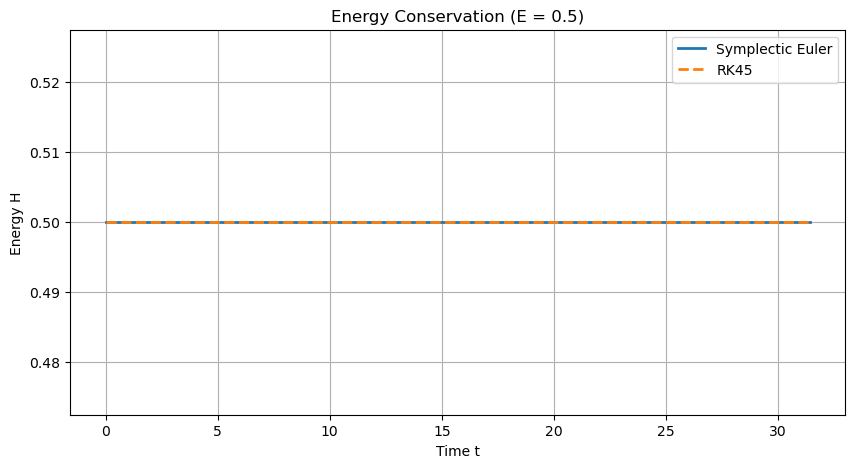


--- Action-Angle ---
Action I(2.0) (Numerical) ≈ 2.0000
Action I(2.0) (Analytical) = 2.0
Frequency ω = dH/dI = 1.0000


In [6]:
# --- System Definition ---
x, p, I = symbols('x p I', real=True, positive=True)
# Hamiltonian: H = p²/2 + x²/2 (mass m=1, spring constant k=1)
H_ho = (p**2 + x**2) / 2
print(f"Hamiltonian: H(x, p) = {H_ho}")

## 1. Poisson Brackets
print("\n--- Poisson Brackets ---")
# The fundamental bracket should be 1: {x, p} = 1
pb_xp = poisson_bracket(x, p)
print(f"{{x, p}} = {pb_xp}")
# The Hamiltonian should commute with itself: {H, H} = 0
pb_hh = poisson_bracket(H_ho, H_ho)
print(f"{{H, H}} = {pb_hh}")

## 2. Integration and Energy Conservation
print("\n--- Integration and Energy Conservation ---")
z0 = (1.0, 0.0) # Initial condition: (x0, p0)
tspan = (0, 10 * np.pi) # 5 periods (T=2*pi)
n_steps = 1000
# Integration with the symplectic integrator (recommended)
traj_symplectic = hamiltonian_flow(H_ho, z0, tspan, integrator='symplectic', n_steps=n_steps)
# Integration with Runge-Kutta 45 (non-symplectic) for comparison
traj_rk45 = hamiltonian_flow(H_ho, z0, tspan, integrator='rk45', n_steps=n_steps)
# Energy plot
plt.figure(figsize=(10, 5))
plt.plot(traj_symplectic['t'], traj_symplectic['energy'], label='Symplectic Euler', linewidth=2)
plt.plot(traj_rk45['t'], traj_rk45['energy'], '--', label='RK45', linewidth=2)
plt.title("Energy Conservation (E = 0.5)")
plt.xlabel("Time t")
plt.ylabel("Energy H")
plt.legend()
plt.grid(True)
plt.show()

## 3. Action-Angle
print("\n--- Action-Angle ---")
E_val = 2.0
# Calculation of the action I(E)
I_num = action_integral(H_ho, E_val, method='numerical', x_bounds=(-np.sqrt(2*E_val), np.sqrt(2*E_val)))
print(f"Action I({E_val}) (Numerical) ≈ {I_num:.4f}")
# For H.O., we know I(E) = E
print(f"Action I({E_val}) (Analytical) = {E_val}")
# Frequency (for H(I)=I, dH/dI = 1)
H_action = I # Hamiltonian as a function of action
omega = frequency(H_action, I_val=I_num)
print(f"Frequency ω = dH/dI = {omega:.4f}")
# Analytically, ω = 1


## Double Well Potential

Hamiltonian (Double Well): H(x, p) = p**2/2 + x**4/4 - x**2/2

--- Fixed Points and Classification ---
Fixed points found: [(-1.0, 0.0), (0.0, 0.0), (1.0, 0.0)]
Point (-1.00, 0.00): Type = center
Point (0.00, 0.00): Type = saddle
Point (1.00, 0.00): Type = center

Saddle Point for Separatrix Analysis: (0.0, 0.0)

--- Phase Space Visualization ---


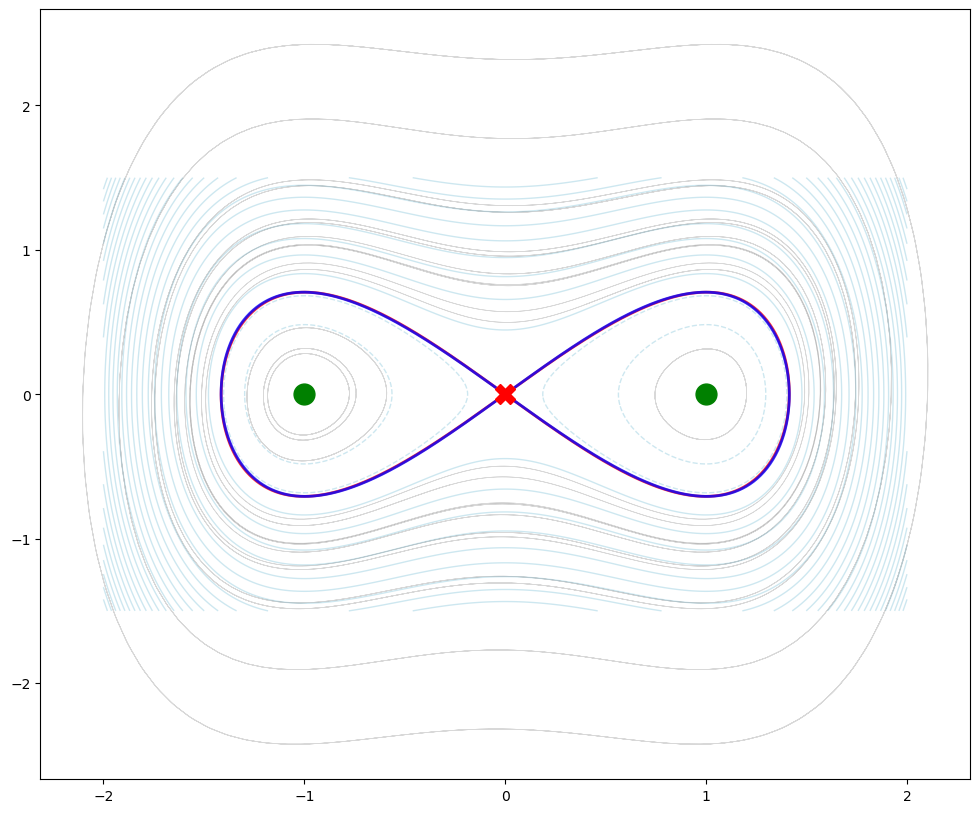

In [7]:
# --- System Definition ---
x, p = symbols('x p', real=True)
# Hamiltonian: H = p²/2 + V(x)
H_double_well = p**2/2 + x**4/4 - x**2/2
print(f"Hamiltonian (Double Well): H(x, p) = {H_double_well}")

## 1. Fixed Points and Classification
print("\n--- Fixed Points and Classification ---")
x_range, p_range = (-2.0, 2.0), (-1.5, 1.5)
fixed_points = find_fixed_points(H_double_well, x_range, p_range)

print(f"Fixed points found: {fixed_points}")

for fp in fixed_points:
    lin = linearize_at_fixed_point(H_double_well, fp)
    print(f"Point ({fp[0]:.2f}, {fp[1]:.2f}): Type = {lin['type']}")

    # Identify the saddle point for separatrix analysis
    if lin['type'] == 'saddle':
        saddle_point = fp

print(f"\nSaddle Point for Separatrix Analysis: {saddle_point}")

## 2. Separatrix Analysis
# Calculate the energy at the saddle point
# sep = separatrix_analysis(H_double_well, x_range, p_range, saddle_point)
# print(f"Separatrix Energy: E_saddle = {sep['E_saddle']:.4f}")

## 3. Phase Space Visualization
print("\n--- Phase Space Visualization ---")
# This function displays energy contours, fixed points, and separatrices.
visualize_phase_space_structure(
    H_double_well,
    x_range,
    p_range,
    fixed_points=fixed_points,
    show_separatrices=True,
    n_trajectories=15
)


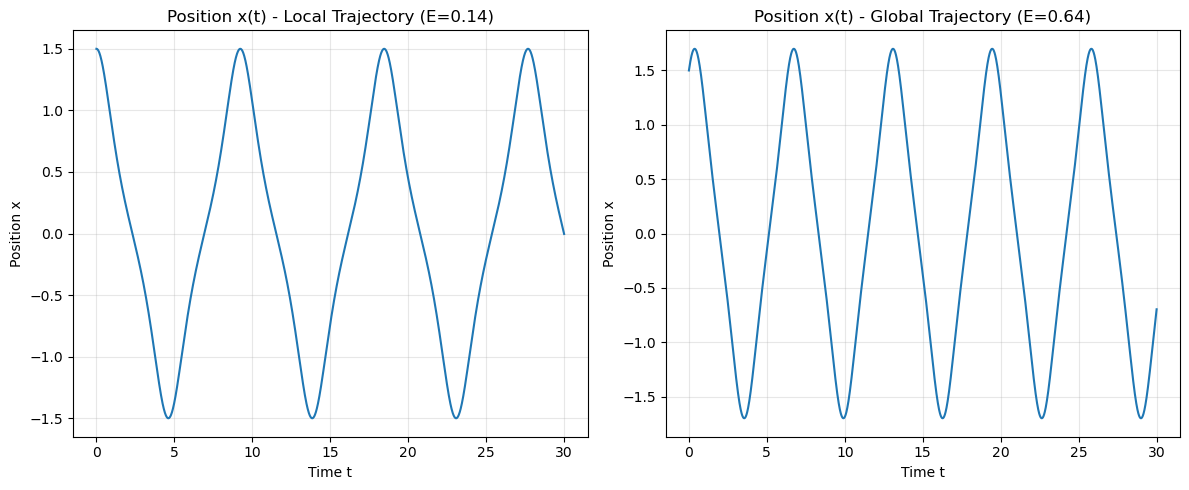

In [10]:
# --- Trajectory 1: Local Oscillation (E < E_saddle = 0) ---
z0_local = (1.5, 0) # Far from the center, but in the right well
traj_local = hamiltonian_flow(H_double_well, z0_local, (0, 30), integrator='verlet', n_steps=2000)
# --- Trajectory 2: Global Oscillation (E > E_saddle = 0) ---
z0_global = (1.5, 1.0) # High-energy initial condition
traj_global = hamiltonian_flow(H_double_well, z0_global, (0, 30), integrator='verlet', n_steps=2000)
# --- Plotting Trajectories Over Time ---
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(traj_local['t'], traj_local['x'])
plt.title(f"Position x(t) - Local Trajectory (E={traj_local['energy'][0]:.2f})")
plt.xlabel("Time t")
plt.ylabel("Position x")
plt.grid(True, alpha=0.3)
plt.subplot(1, 2, 2)
plt.plot(traj_global['t'], traj_global['x'])
plt.title(f"Position x(t) - Global Trajectory (E={traj_global['energy'][0]:.2f})")
plt.xlabel("Time t")
plt.ylabel("Position x")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
